## 6.1.5 Plot Gain and Lift Charts using Python

The following Python codes show examples of how to derive cumulative gain and lift charts using the data modeling algorithm of Decision Tree, using the Python functions of `plot_cumulative_gain()` and `plot_lift_curve()`, respectively. 

The comments embedded in the codes give descriptions to guide the rationale of the programming logic. 

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import scikitplot as skplt

# specify dataset source, inputs and target
df = pd.read_csv('data/ChurnFinal.csv')
df_inputs = pd.get_dummies(df[['Gender', 'Age', 'PostalCode', 'Cash', 'CreditCard', 
                'Cheque', 'SinceLastTrx', 'SqrtTotal', 'SqrtMax', 'SqrtMin']])
df_label = df['Churn']

# initiate modelling objects using differnt algorithms
clf_tree = DecisionTreeClassifier(criterion = 'entropy', splitter="best", 
            max_depth=5, min_samples_leaf=5, min_samples_split=0.1, random_state=7) 

# spliting train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_label, 
            stratify=df_label, test_size=0.3, random_state=7) 

# train models
clf_tree.fit(X_train, y_train)

# apply models for predictions
y_predict = clf_tree.predict_proba(X_test)

# plot cummulative gain chart
skplt.metrics.plot_cumulative_gain(y_test, y_predict)
#add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Gain')
plt.title('Cummulative Gain Chart')
plt.legend(loc="lower right")


# save to cummulative gain chart to file
import os
strFile = "plot_gain.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig(strFile) 
plt.clf()  

# plot lift chart
skplt.metrics.plot_lift_curve(y_test, y_predict)

#add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend(loc="lower right")

# save to Lift chart to file
import os
strFile = "plot_lift.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig("img/"+strFile) 
plt.clf()  

After running the above Python codes, we can observe the cumulative gain and lift charts in plot_gain.png and plot_lift.png, respectively as follows:

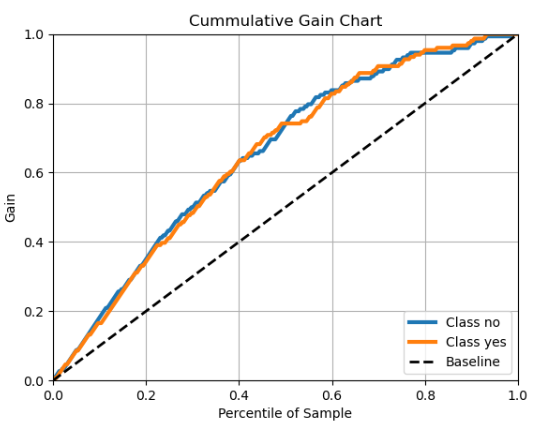

In [11]:
from IPython import display
display.Image("img/gain chart.png")

Recall that gain or lift charts evaluate model performance in a portion of the dataset population. They measure the effectiveness of a classification model calculated as the ratio between the results obtained with and without the model. From the Gain chart above, we can observe that the Decision Tree model performs slightly better (for both labels 'yes' and 'no') than without a model. For example, at the sample's 10% and 40% percentiles, the Decision Tree model achieves a better 50% gain (i.e., 0.2 and 0.65 gains with the model compared to 0.1 and 0.4 gains without the model). 

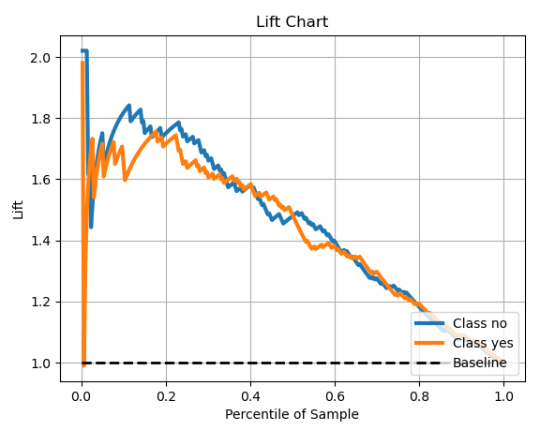

In [12]:
from IPython import display
display.Image("img/lift chart.png")

For the lift chart above, we can observe that the model is not stable before the 20% percentile of the sample. Approximately at 22% percentile of the sample, the Decision Tree model achieved a 1.8 times lift for the label 'no' and 1.75 times lift for the label 'yes'. This implies that merely using the first 22% samples, and there are 1.75 and 1.8 times more likely we can capture the churned and non-churned customers compared to no model (i.e., a random guess).

NOTE: For a detailed explanation of the Python API performance metrics() parameters with the plot_cumulative_gain() and plot_lift_curve() functions , refer to the official website, https://scikit-plot.readthedocs.io/en/stable/metrics.html.  